<a href="https://colab.research.google.com/github/alandavidgrunberg/example_notebooks/blob/master/matplotlib_and_seaborn/mlp_classification__handwritten_digits_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

X, y = load_digits(n_class=2, return_X_y=True) # 'load_digits' dataset contains 10 classes: digits 0 through 9. 'n_class=2' selects only the first 2 digits: 0 and 1. 'return_X_y' returns (data, target) tuple. Unpacked and assigned to variables X, y

print("feature matrix X:", X.shape) # 360 datapoints with 64 features each
print("target array y:", y.shape) # 360 targets
print()


feature matrix X: (360, 64)
target array y: (360,)



first image:

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

0

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]



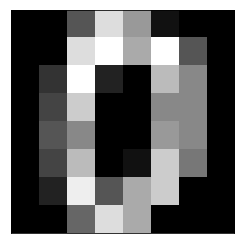

In [4]:
print("first image:")
print()
print( X[0]) # show first datapoint's feature array. each datapoint is an 8 x 8 pixels grayscale image of a 0 or 1. the features are 64 values from 0 (black) to 16 (white). 
print()
print(y[0]) # show target class label of first datapoint (0)
print()
print(X[0].reshape(8, 8)) # it's easier to make out the digit in the image if we reshape the array to 8 x 8
print()

# view image directly using matplotlib
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray) # 'matshow()' displays an array as a matrix, 'cmap=' passing grayscale colormap 
plt.xticks(()) # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

second image:

1

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]



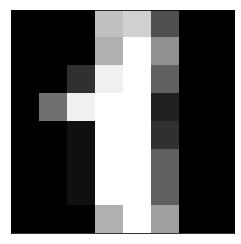

In [5]:
print("second image:")
print()
print(y[1]) # show target class label of second datapoint (1)
print()
print(X[1].reshape(8, 8)) # second datapoint's feature array (reshaped to 8 x 8)
print()

# view image directly using matplotlib
plt.matshow(X[1].reshape(8, 8), cmap=plt.cm.gray) # 'matshow()' displays an array as a matrix, 'cmap=' passing grayscale colormap 
plt.xticks(()) # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

In [7]:
import numpy as np
from sklearn.neural_network import MLPClassifier

X, y = load_digits(n_class=4, return_X_y=True) # 'load_digits' dataset contains 10 classes: digits 0 through 9. 'n_class=2' selects only the first 4 digits: 0,1,2,3. 'return_X_y' returns (data, target) tuple. Unpacked and assigned to variables X, y

print(X.shape, y.shape) # 720 datapoints, 64 features (8 x 8 pixels)
print(np.min(X), np.max(X)) # feature values range from 0 (white) to 16 (black)
print(y[0:4]) # first 4 target values: digits 0 to 3 


(720, 64) (720,)
0.0 16.0
[0 1 2 3]


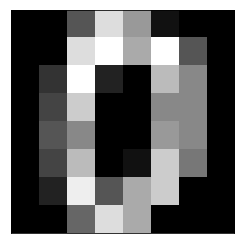

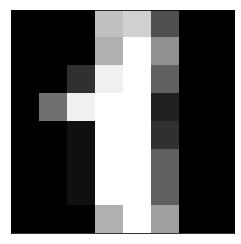

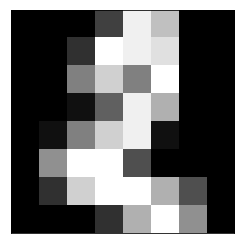

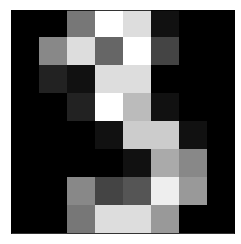

In [8]:
#first 4 images:
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray) # 'matshow()' displays an array as a matrix, 'cmap=' passing grayscale colormap 
plt.xticks(()) # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

plt.matshow(X[1].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(()) 
plt.yticks(()) 
plt.show()

plt.matshow(X[2].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(()) 
plt.yticks(()) 
plt.show()

plt.matshow(X[3].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(()) 
plt.yticks(()) 
plt.show()

(64, 6)


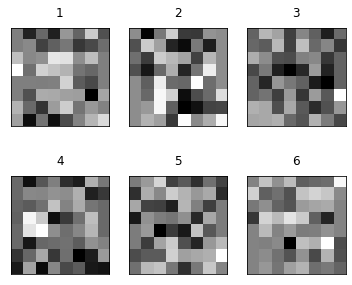

In [9]:

mlp=MLPClassifier(hidden_layer_sizes=(6), max_iter=500, random_state=99) # instantiate neural network with: 1 hidden layer w/ 6 nodes
                                                        # default n input nodes = n features, 'relu' activation for hidden layer.
                                                        # default for multilabel classification: n output neurons = n targets, 'softmax' activation for output layer
#  
#                                    input layer  ->  hidden layer  ->  output layer
#                                    64 neurons       6 neurons         4 neurons (targets 0, 1, 2, 3)
#                                                     relu activation   softmax activation

mlp.fit(X, y) # fit neural network. takes a while but it does converge (find optimal coefficients: weights and biases)


#visualize weights of hidden layer

print(mlp.coefs_[0].shape) # neural network's weights stored in  'mlp.coefs_' as a list with 2 elements. 
                           # the first element in the list is an array of the weights for the hidden layer.
                           # row = features, column = each neuron in the hidden layer. so 84 features with 6 weights each (one per hidden layer neuron)

fig, axes = plt.subplots(2, 3, figsize=(6, 5)) # use 'subplots()' to create multiple axes (plots) within a single figure. creates 2 rows x 3 columns array of axes (6 axes)
for i, ax in enumerate(axes.ravel()): # 'ravel()' reshapes axes from 2d array (2,3) to 1d array (6,)
                                      # 'enumerate()' makes the axes iterable (capable of being called one at a time in a 'for' loop)
                                      # 'for' loop over 'i' and each 'ax' (runs 6 times because 6 axes)
    weights = mlp.coefs_[0][:, i] # selects each column from array of weights for the hidden layer. i column = i neuron's weights (1st column = 1st neuron's weights, etc.)
    ax.matshow(weights.reshape(8, 8), cmap=plt.cm.gray) # reshapes each neuron's 784 weights to a 28 x 28 grid, plots them with grayscale colormap
    ax.set_xticks(()) # erases tick marks
    ax.set_yticks(()) # "
    ax.set_title(i + 1) # sets each plot's title
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

## predicting digits (1 through 9) with neural network

X, y = load_digits(return_X_y=True) # load dataset, this time the whole set 1 through 9, data and targets unpacked and assigned to X, y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) # train/test split on whole dataset

mlp = MLPClassifier(random_state=3) # instantiate model. default one hidden layer with 100 neurons, 'relu' activation. 64 neurons in input layer because dataset has 64 features. 1 neuron in output layer because binary classification. defaults output layer 'softmax' activation because multilabel classification (10 target labels, digits 0 through 9). therefore, neural network shape is:
#
#                                    input layer  ->  hidden layer  ->  output layer
#                                    64 neurons       100 neurons       10 neurons
#                                                     relu activation   softmax activation
#                                                                       (highest output neuron chosen)

mlp.fit(X_train, y_train) # fit model

print("first 5 predictions:", mlp.predict(X_test[0:5])) # first 5 predictions
print("first 5 targets:    ", y_test[0:5]) # first 5 targets (actual values)
print("model accuracy: ", mlp.score(X_test, y_test)) # model accuracy


first 5 predictions: [4 0 9 1 8]
first 5 targets:     [4 0 9 1 4]
model accuracy:  0.96


incorrect predictions:


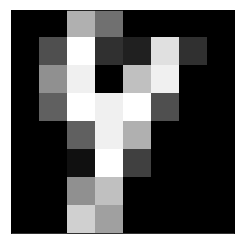

true value: 4
predicted value: 8


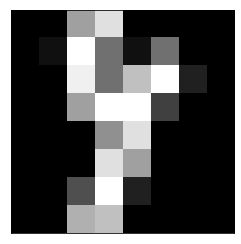

true value: 4
predicted value: 1


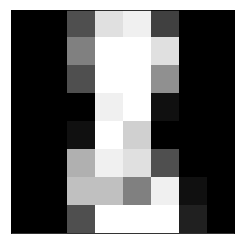

true value: 8
predicted value: 2


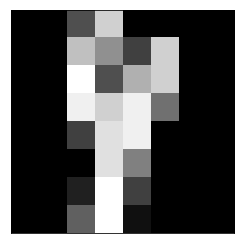

true value: 4
predicted value: 8


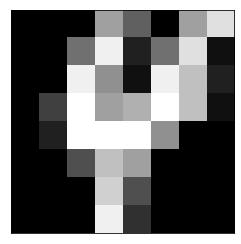

true value: 4
predicted value: 7


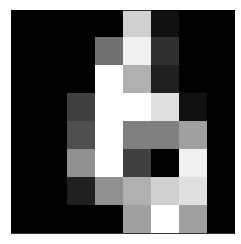

true value: 6
predicted value: 1


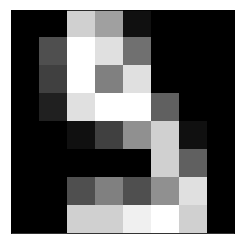

true value: 9
predicted value: 5


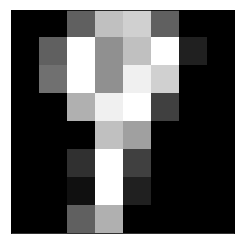

true value: 9
predicted value: 1


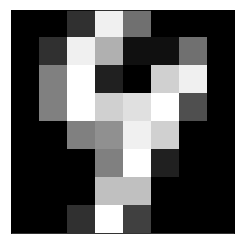

true value: 4
predicted value: 9


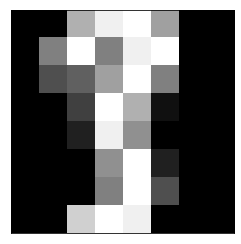

true value: 3
predicted value: 8


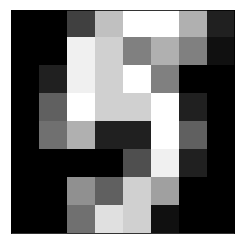

true value: 5
predicted value: 9


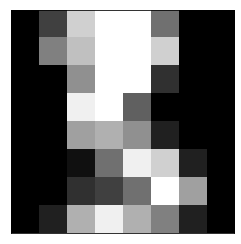

true value: 3
predicted value: 5


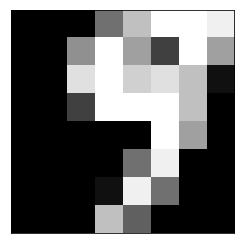

true value: 9
predicted value: 7


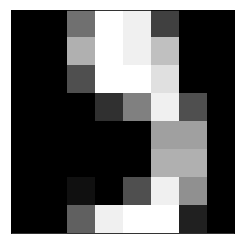

true value: 9
predicted value: 3


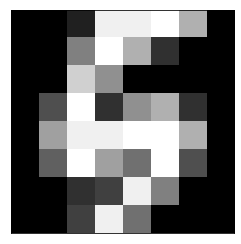

true value: 5
predicted value: 4


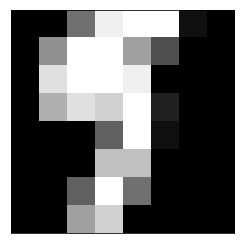

true value: 5
predicted value: 1


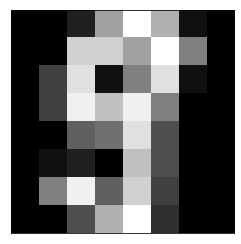

true value: 9
predicted value: 8


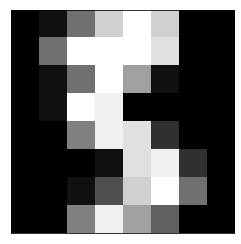

true value: 3
predicted value: 5


In [12]:
# looking at incorrect predictions
y_pred = mlp.predict(X_test) # predictions for all testing datapoints
wrong_pred_mask = (y_pred != y_test) # list of T/F values, T where test predictions don't match test targets
incorrect = X_test[wrong_pred_mask] # mask applied to testing data points, pulls out datapoints predicted incorrectly
incorrect_pred = y_pred[wrong_pred_mask] # mask applied to predictions, pulls out incorrect predictions 
incorrect_true = y_test[wrong_pred_mask] # mask applied to targets, pulls out actual values for wrong preds

print("incorrect predictions:")
for i in range(len(incorrect)): # length of 'incorrect' = 18, 'range(18)' = 0,1,2,3...to 17. So loop runs 18 times, once for each incorrect prediction
  plt.matshow(incorrect[i].reshape(8, 8), cmap=plt.cm.gray) # plot each incorrectly predicted datapoint's feature array as an 8 x 8 grayscale image 
  plt.xticks(()) # remove tick marks
  plt.yticks(()) # remove tick marks
  plt.show()
  print("true value:", incorrect_true[i]) # show each incorrectly predicted datapoint's actual target value
  print("predicted value:", incorrect_pred[i]) # show the neural network's prediction for eachincorrectly predicted datapoint

# code and comments by github.com/alandavidgrunberg
    